In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import joblib
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv(r"C:\Users\abdel\Desktop\Housing.csv")

In [15]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [16]:
data =data.drop_duplicates()

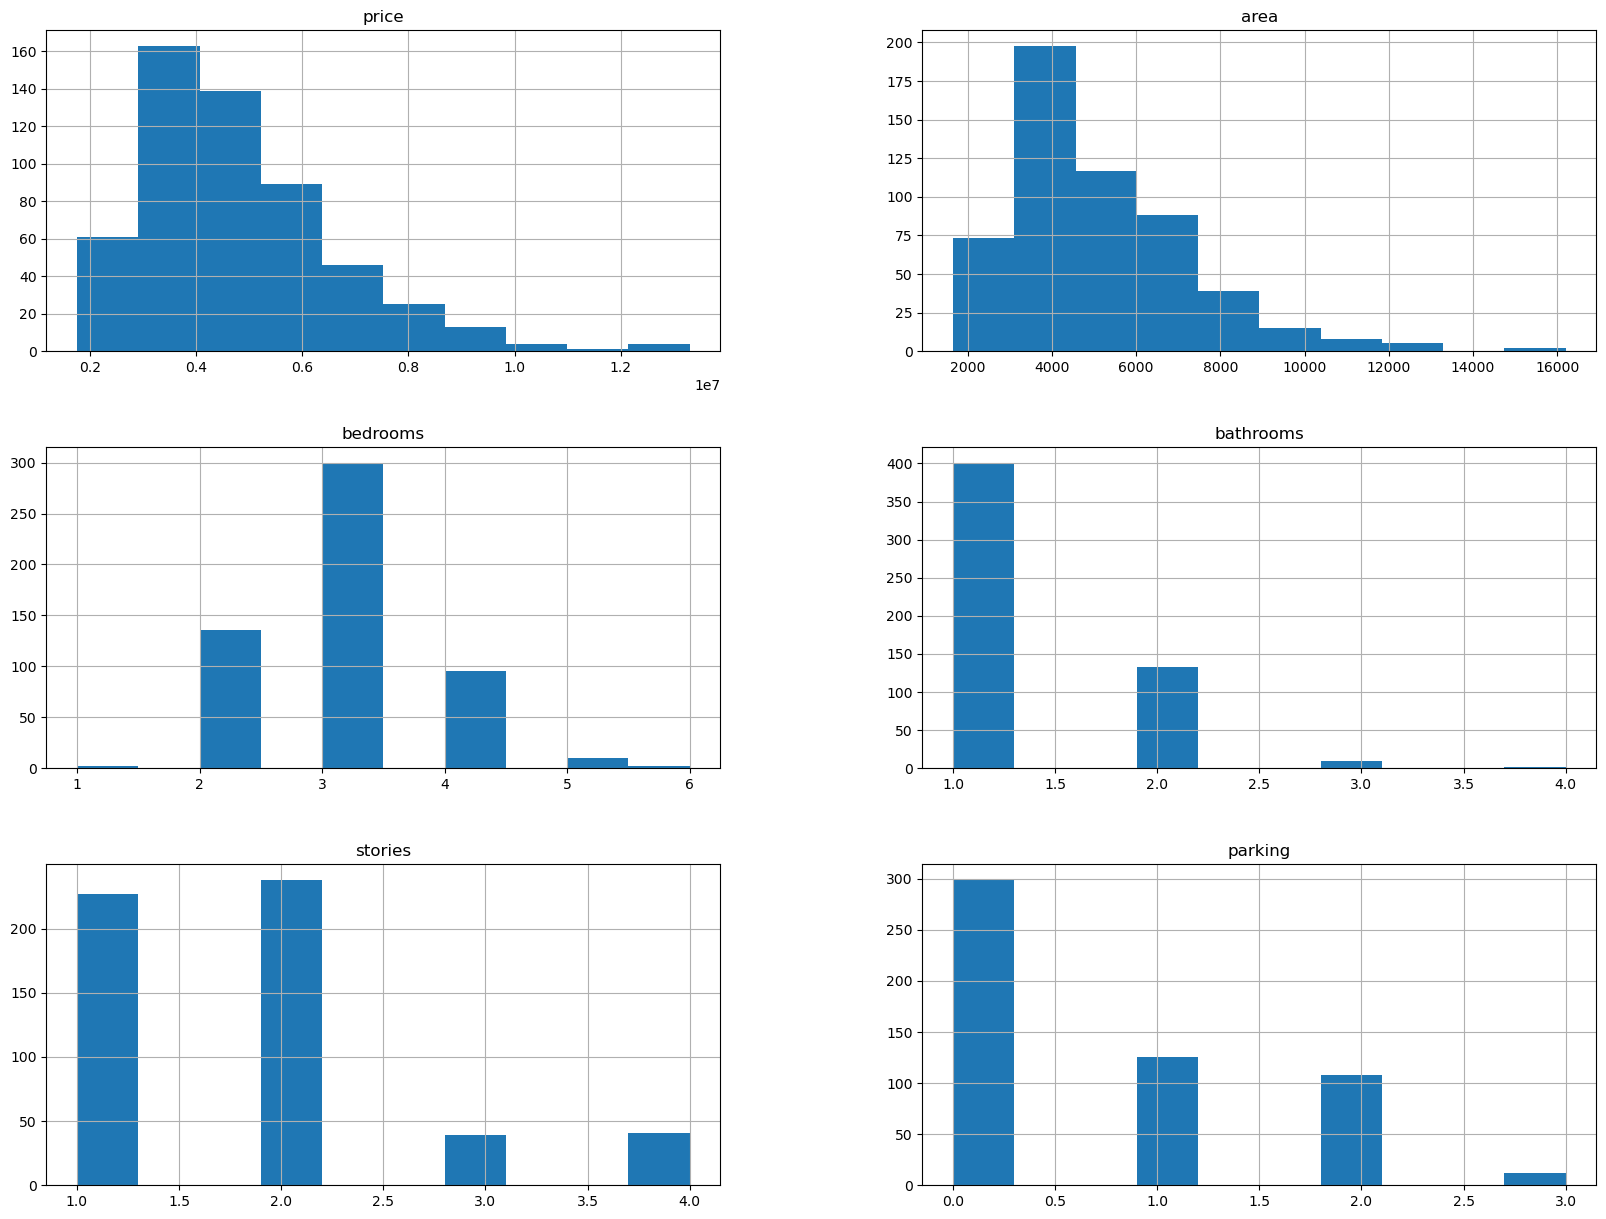

In [19]:
data.hist(bins=10, figsize=(20, 15))
plt.show()

In [20]:
label_encoders = {}
for column in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
data = pd.get_dummies(data, columns=['furnishingstatus'])

In [21]:
X = data.drop('price', axis=1)
Y = data['price']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=20, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [24]:
Y_predict = model.predict(X_test)

In [26]:
mse = mean_squared_error(Y_test, Y_predict)

In [27]:
print("Mean squard error = ", mse)

Mean squard error =  1481674252126.4546


In [28]:
joblib.dump(model, r"C:\Users\abdel\Desktop\Housing.pk1")

['C:\\Users\\abdel\\Desktop\\Housing.pk1']

In [29]:
def predict_hosue_price(model, features):
    input_data = pd.DataFrame([features], columns=X.columns)
    predict_price = model.predict(input_data)
    return predict_price

In [33]:
user_input = {}
for column in X.columns:
    user_input[column] = int(input(f"Enter {column}: "))
predict_price = predict_hosue_price(model, user_input)
print('Predict Price for house is: ', predict_price[0])

Enter area: 2000
Enter bedrooms: 3
Enter bathrooms: 2
Enter stories: 2
Enter mainroad: 1
Enter guestroom: 0
Enter basement: 1
Enter hotwaterheating: 1
Enter airconditioning: 0
Enter parking: 1
Enter prefarea: 1
Enter furnishingstatus_furnished: 1
Enter furnishingstatus_semi-furnished: 0
Enter furnishingstatus_unfurnished: 0
Predict Price for house is:  [6381817.06754187]
